<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes_de_multicapa/Predicci%C3%B3n_de_la_eficiencia_del_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Predicción de la eficiencia del combustible*

**Conjunto de datos**

Base de datos de automoviles, para predecir la regrsión

In [23]:
# Instala el paquete ucimlrepo, que permite acceder fácilmente a conjuntos de datos clásicos del repositorio UCI
pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo # del repositorio importa y baja los repositorios

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features # Caracteristicas
y = auto_mpg.data.targets  # Mostrar el conjunto


In [25]:
X.head() # 7 parámetros para predecir: caballos de fuerza, año, peso, aceleración, origen...

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [26]:
y.head() # problema de conexión continua, donde mpg: Eficiencia de combustible

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Notamos cuantas variabes nulas tiene el conjunto X e y.

In [27]:
X.info() # columnas con 7 parámetros, elementos no nulos, unidades en numeros enteros y flotantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Hacemos lo siguiente para eliminar las variable no nulas y eliminarlas simultaneamente.

In [29]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna() # concatenar las caracteristicas que son 7, pasar la columna de y en x y tenemos 8 columnas

In [30]:
df.shape #Verficicar que los valores

(392, 8)

Notamos cuantas variabes nulas tiene el conjunto

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [32]:
df.describe # estadisticamente así es el DataFrame: media,mediana,moda,cuartiles,quintiles...

<bound method NDFrame.describe of      displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin   mpg  
0         1  18.0  
1         1  15.0  
2         1  18.0  
3         1  16.0  
4         1  17.0  
..      ...   ...  
393       1  27.0  
394       2  44.0  
395       1  32.0  
396       1  28.0  
397       1  31.0  

[392 rows x 8 columns]>

Finalmente nuevamente, debemos definir los conjuntos X e y

In [33]:
X = df.drop('mpg', axis=1) # Definir quien es X y Y
y = df['mpg']

Dividir los datos en conjuntos de entrenamiento y prueba

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)

In [35]:
print(X_train.shape) #test con 79 datos 20% y 313 datos es el 80% de mis datos
print(X_test.shape)

(313, 7)
(79, 7)


Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

In [36]:
from sklearn.preprocessing import StandardScaler # Que otros procesos para escandalizar existen

scaler = StandardScaler() # quiero que la desviación estándar sea 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

También, se puede utilizar, MinMaxScaler().

## **Red Neuronal Multicapa**

Definir el modelo de Red Neuroonal

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # Solo se necesita una neurona
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilar el modelo**

Crear un optimizador Adam con una tasa de aprendizaje del 0.001

In [38]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error', #error cuadrática promedio
    metrics=['root_mean_squared_error'], #error squared promedio, elevarlo al cuadrado
)

In [39]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


Entrenar el modelo

In [40]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=1, #solo hay 5 épocas
    validation_data=(X_test, y_test)
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 417.2242 - root_mean_squared_error: 20.0365 - val_loss: 22.8509 - val_root_mean_squared_error: 4.7803
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 14.1264 - root_mean_squared_error: 3.7543 - val_loss: 15.0521 - val_root_mean_squared_error: 3.8797
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 11.4937 - root_mean_squared_error: 3.3762 - val_loss: 10.6919 - val_root_mean_squared_error: 3.2698
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.6878 - root_mean_squared_error: 2.9294 - val_loss: 11.1751 - val_root_mean_squared_error: 3.3429
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5991 - root_mean_squared_error: 2.9200 - val_loss: 13.0714 - val_root_mean_squared_error: 3.6154
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6757 - root_mean_squared_error: 2.7597 - val_loss: 10.6607 - val_root_mean_squared_error: 3.2651
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 

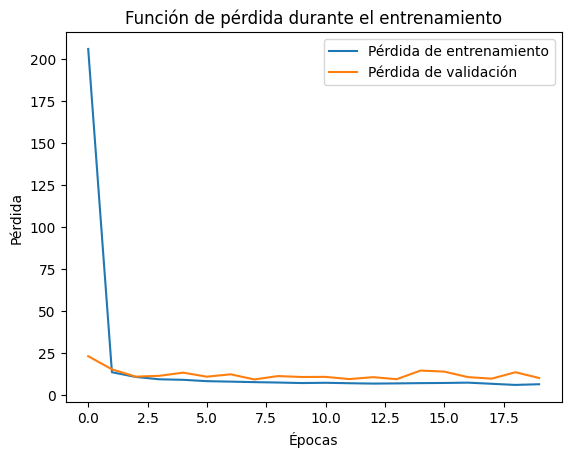

In [41]:
import matplotlib.pyplot as plt #Calcular la función de pérdida

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

Se nota que la función de pérdida debe tender hacia cero.

In [42]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.2833 - root_mean_squared_error: 3.0397 
Test Mean Absolute Error: 3.15


# **Predicciones**

Hacer predicciones y comparar las predicciones con los valores reales

In [43]:
predictions = model.predict(X_test) #tomamos datos al azar cuyos valores actuales predicen 21.76 modelos, los resultados son los errores
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
     Actual  Predicted
82     23.0  21.190624
167    29.0  27.360970
356    32.4  33.876396
120    19.0  19.433954
385    38.0  37.751297


# **Otras métricas**

In [44]:
from sklearn.metrics import r2_score, mean_squared_error #sirven para predecir

r2 = r2_score(y_test, predictions) #r2 vive entre 0 y 1, valor cercano a 1 predice si los valores son tolerables
print(f'R²: {r2}') # el modelo sirve para describir y es bueno, porque tenemos el .86 de correlación

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

R²: 0.8571794406367026
MSE: 9.900646131311643


El codigo eliminara los nulos y va a normalizar.
Hara un entrenamiento y lo probara, el modelado creara la red neuronal para la regresion.
El entrenamiento va a ajustar los pesos, la evaluacion se encargara de calcular los errores y las metricas y la prediccion va a estimar los valores de consumo del combustible